# Introduction

In this notebook we perform the generalization study with our self-trained references. The first part uses a variable learning rate alpha in recovery, while the second part evaluates the tendencies with a fixed learning rate.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from dataset import *
from train_abs import *
from test_abs import *

%load_ext autoreload
%autoreload 2

cuda
Loaded util functions


In [2]:
# import data
x_train_mnist, x_test_mnist = load_MNIST(32)
x_train_fmnist, x_test_fmnist = load_FMNIST(32)
x_train_cifar, x_test_cifar = load_CIFAR10(32, channel = -1)

# load provided references
u_fmnist_true = np.load('./trained_u/u_fmnist.npy')

# If this references are not available, please run 'Reconstruction Using Learned References.ipynb' first.
u_mnist = np.load('./output_abs/20200202_mnist_5_1_32_1_1_50_[0, 1]/u_mnist_32.npy')
u_fmnist = np.load('./output_abs/20200202_fmnist_5_1_32_1_1_50_[0, 1]/u_fmnist_32.npy')
u_cifar = np.load('./output_abs/20200202_cifar_5_1_32_1.3_1_50_[0, 1]/u_cifar_32.npy')

# load the testsizes
n_test_mnist = 10000
n_test_fmnist = len(x_test_fmnist)
n_test_cifar = len(x_test_cifar)

Loaded MNIST dataset: x_train(100000, 32, 32), x_valid(140000, 32, 32)
Loaded FashionMNIST gray dataset: x_train(60000, 32, 32), x_valid(10000, 32, 32)
Files already downloaded and verified
Files already downloaded and verified
using Gray image
Loaded CIFAR10 gray dataset: x_train(50000, 32, 32), x_valid(10000, 32, 32)


In [3]:
# these are the default hyperparameters, we use only 5 epochs for computational reasons
n_steps = 50
n_epoch = 5
n_train = 32
n_batch = 32
lr_u = 1
alpha = 1
U_range = [0,1]

# 1. Using variable learning rate alpha

mnist vs fmnist


100%|██████████| 313/313 [00:03<00:00, 81.55it/s]


mse 0.00
psnr 40.62
ssim 0.96
mean mse 0.00
psnr of mean 26.38
psnr of mean (mean of psnr) 26.38(40.62)


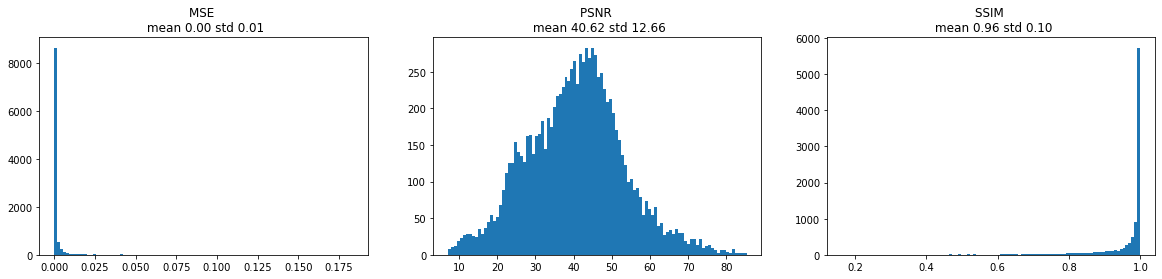

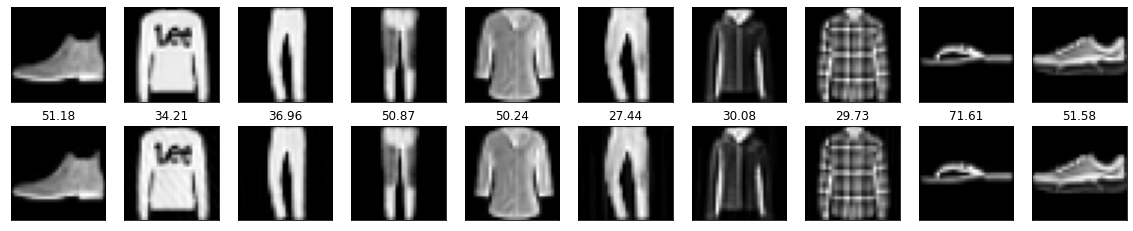

  3%|▎         | 9/313 [00:00<00:03, 81.24it/s]

mnist vs cifar


100%|██████████| 313/313 [00:03<00:00, 81.59it/s]


mse 0.00
psnr 31.71
ssim 0.94
mean mse 0.00
psnr of mean 24.94
psnr of mean (mean of psnr) 24.94(31.71)


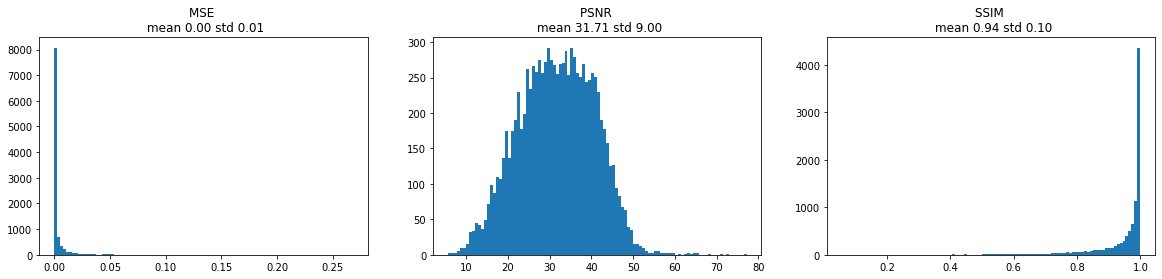

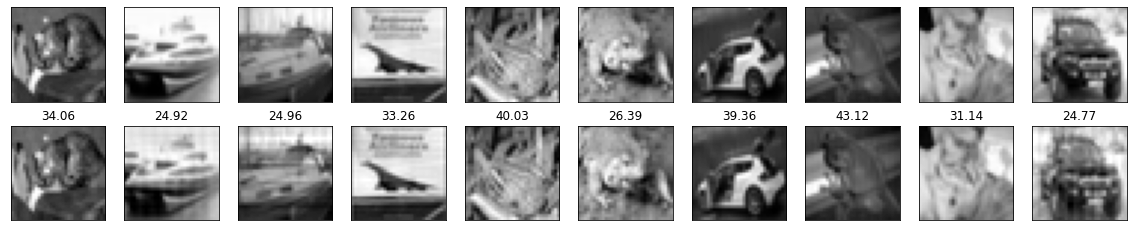

In [4]:
print("mnist vs fmnist")
rec_fmnist, mse_fmnist,psnr_fmnist,ssim_fmnist = test_abs(n_test_fmnist, n_batch, n_steps, 0.795, u_mnist, x_test_fmnist)
plot_test(rec_fmnist,
          x_test_fmnist,
          mse_fmnist,
          psnr_fmnist,
          ssim_fmnist,
          n_test_fmnist,
          plot_n = 10)

print("mnist vs cifar")
rec_cifar,mse_cifar,psnr_cifar,ssim_cifar = test_abs(n_test_cifar, n_batch, n_steps, 0.95, u_mnist, x_test_cifar)
plot_test(rec_cifar,
          x_test_cifar,
          mse_cifar,
          psnr_cifar,
          ssim_cifar,
          n_test_cifar,
          plot_n = 10)

  3%|▎         | 9/313 [00:00<00:03, 81.39it/s]

fmnist vs mnist


100%|██████████| 313/313 [00:03<00:00, 81.20it/s]


mse 0.00
psnr 40.75
ssim 0.94
mean mse 0.00
psnr of mean 24.75
psnr of mean (mean of psnr) 24.75(40.75)


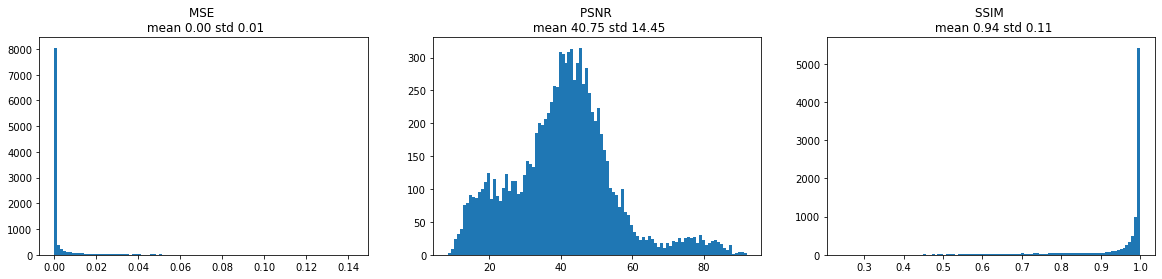

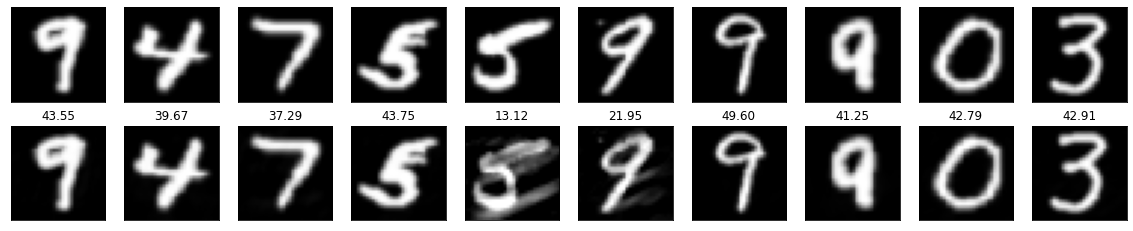

  3%|▎         | 9/313 [00:00<00:03, 81.74it/s]

fmnist vs cifar


100%|██████████| 313/313 [00:03<00:00, 81.16it/s]


mse 0.01
psnr 33.73
ssim 0.90
mean mse 0.01
psnr of mean 19.59
psnr of mean (mean of psnr) 19.59(33.73)


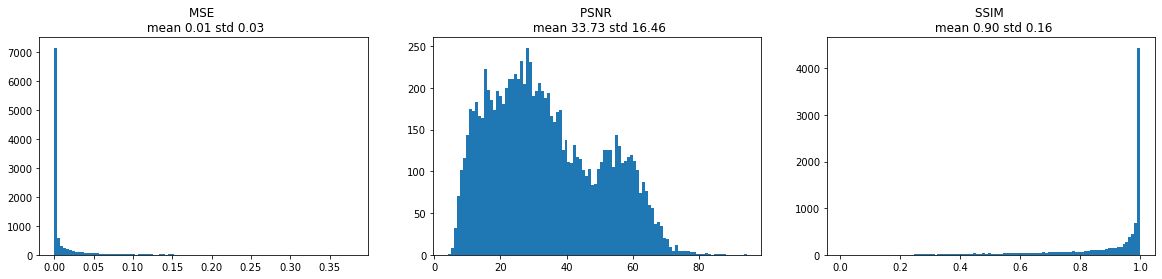

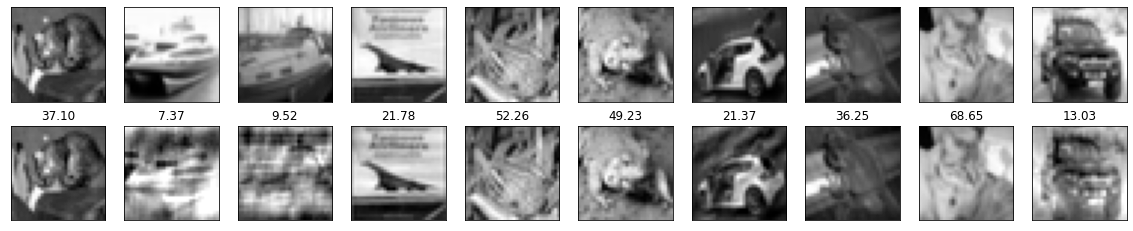

In [5]:
print("fmnist vs mnist")
rec_mnist,mse_mnist,psnr_mnist,ssim_mnist = test_abs(n_test_mnist, n_batch, n_steps, 0.73, u_fmnist, x_test_mnist)
plot_test(rec_mnist,
          x_test_mnist,
          mse_mnist,
          psnr_mnist,
          ssim_mnist,
          n_test_mnist,
          plot_n = 10)

print("fmnist vs cifar")
rec_cifar,mse_cifar,psnr_cifar,ssim_cifar = test_abs(n_test_cifar, n_batch, n_steps, 1.855, u_fmnist, x_test_cifar)
plot_test(rec_cifar,
          x_test_cifar,
          mse_cifar,
          psnr_cifar,
          ssim_cifar,
          n_test_cifar,
          plot_n = 10)

## Additional experiment for FMNIST vs CIFAR10

  3%|▎         | 9/313 [00:00<00:03, 81.79it/s]

fmnist vs cifar


100%|██████████| 313/313 [00:03<00:00, 81.20it/s]


mse 0.01
psnr 40.72
ssim 0.93
mean mse 0.01
psnr of mean 20.78
psnr of mean (mean of psnr) 20.78(40.72)


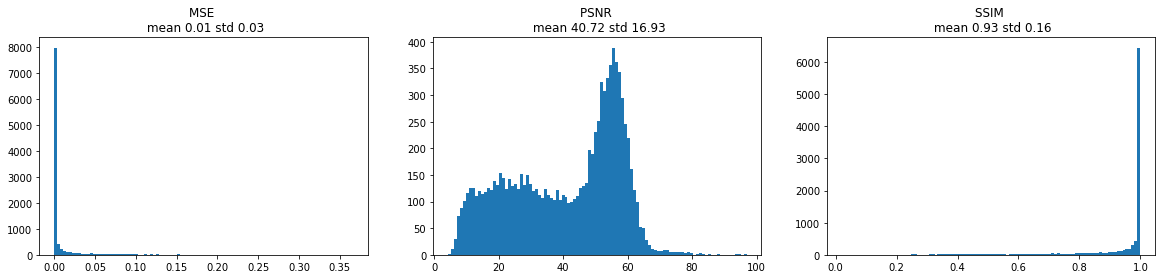

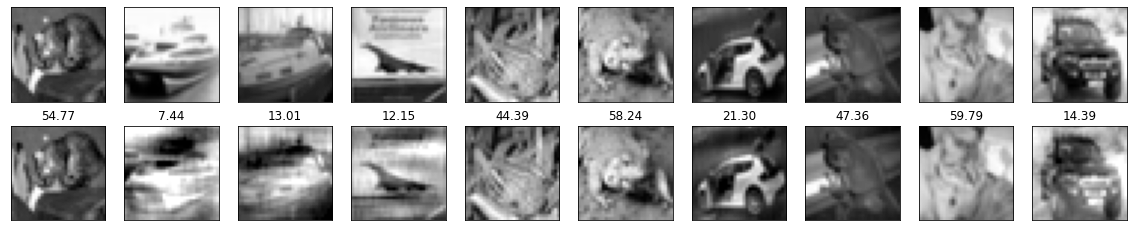

In [6]:
print("fmnist vs cifar")
rec_cifar,mse_cifar,psnr_cifar,ssim_cifar = test_abs(n_test_cifar, n_batch, n_steps, 1.87, u_fmnist_true, x_test_cifar)
plot_test(rec_cifar,
          x_test_cifar,
          mse_cifar,
          psnr_cifar,
          ssim_cifar,
          n_test_cifar,
          plot_n = 10)

  3%|▎         | 9/313 [00:00<00:03, 80.29it/s]

cifar vs mnist


100%|██████████| 313/313 [00:03<00:00, 81.22it/s]


mse 0.00
psnr 31.76
ssim 0.92
mean mse 0.00
psnr of mean 24.23
psnr of mean (mean of psnr) 24.23(31.76)


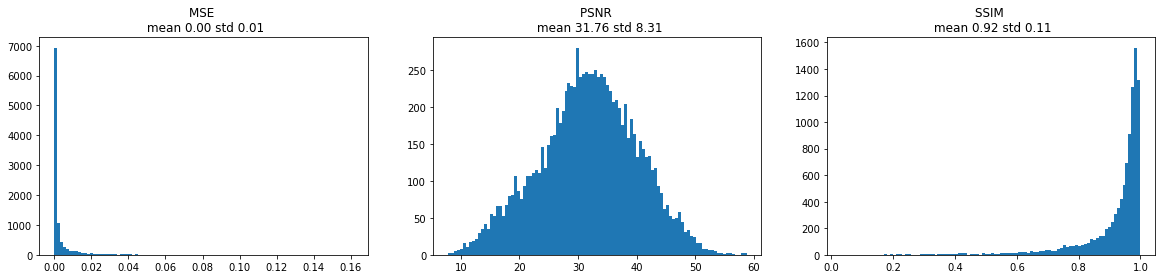

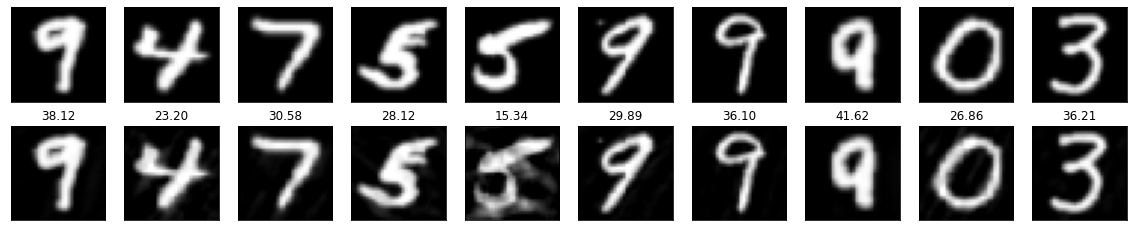

  3%|▎         | 9/313 [00:00<00:03, 80.69it/s]

cifar vs fmnist


100%|██████████| 313/313 [00:03<00:00, 81.32it/s]


mse 0.00
psnr 36.45
ssim 0.95
mean mse 0.00
psnr of mean 28.80
psnr of mean (mean of psnr) 28.80(36.45)


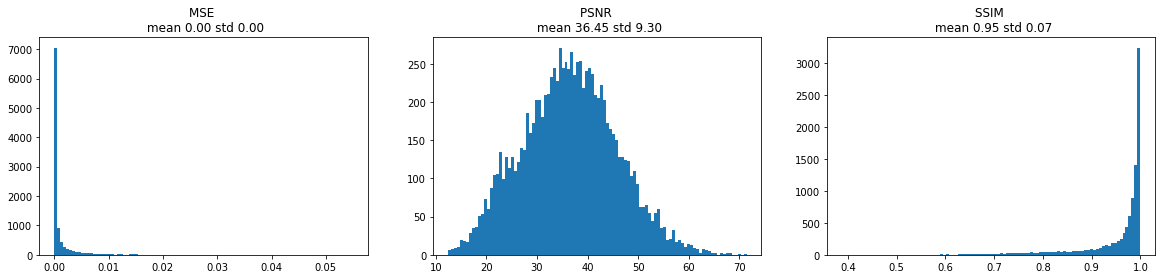

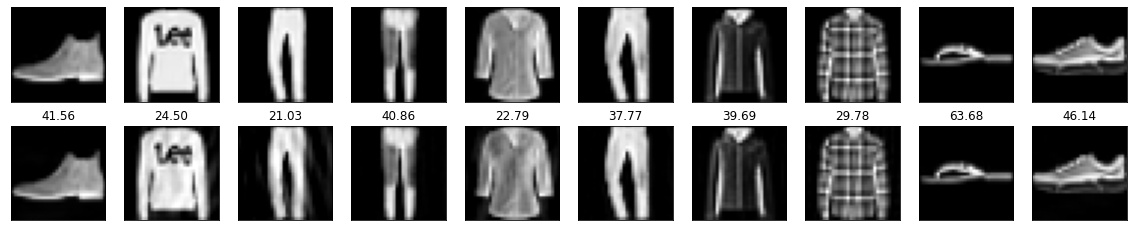

In [7]:
print("cifar vs mnist")
rec_mnist,mse_mnist,psnr_mnist,ssim_mnist = test_abs(n_test_mnist, n_batch, n_steps, 0.405, u_cifar, x_test_mnist)
plot_test(rec_mnist,
          x_test_mnist,
          mse_mnist,
          psnr_mnist,
          ssim_mnist,
          n_test_mnist,
          plot_n = 10)

print("cifar vs fmnist")
rec_fmnist,mse_fmnist,psnr_fmnist,ssim_fmnist = test_abs(n_test_fmnist, n_batch, n_steps, 0.55, u_cifar, x_test_fmnist)
plot_test(rec_fmnist,
          x_test_fmnist,
          mse_fmnist,
          psnr_fmnist,
          ssim_fmnist,
          n_test_fmnist,
          plot_n = 10)

# 2. Using a fixed alpha

  3%|▎         | 9/313 [00:00<00:03, 81.15it/s]

mnist vs mnist


100%|██████████| 313/313 [00:03<00:00, 81.08it/s]


mse 0.00
psnr 59.76
ssim 0.99
mean mse 0.00
psnr of mean 33.52
psnr of mean (mean of psnr) 33.52(59.76)


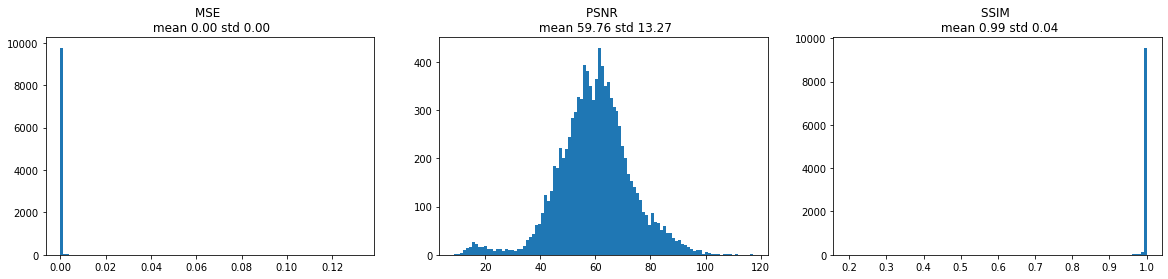

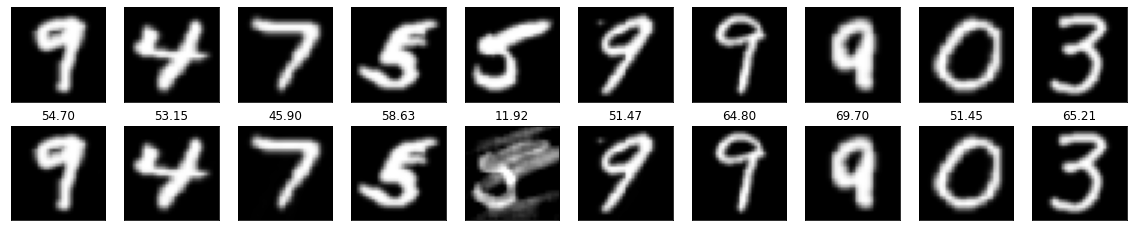

  3%|▎         | 9/313 [00:00<00:03, 81.55it/s]

mnist vs fmnist


100%|██████████| 313/313 [00:03<00:00, 81.25it/s]


mse 0.00
psnr 45.77
ssim 0.96
mean mse 0.00
psnr of mean 26.84
psnr of mean (mean of psnr) 26.84(45.77)


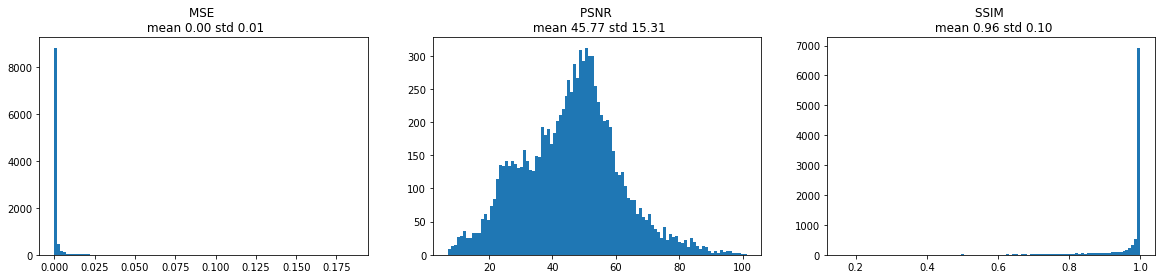

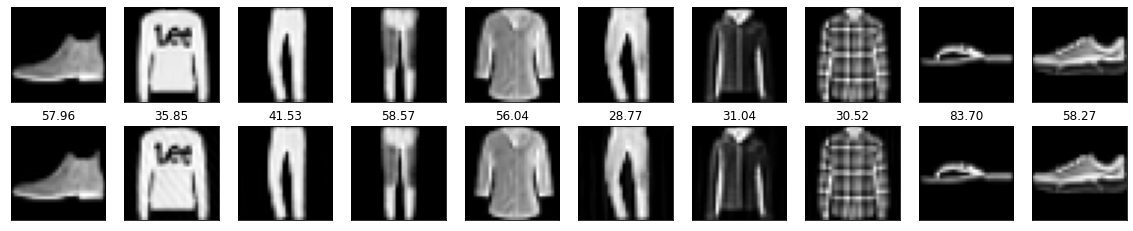

  3%|▎         | 9/313 [00:00<00:03, 81.27it/s]

mnist vs cifar


100%|██████████| 313/313 [00:03<00:00, 81.35it/s]


mse 0.00
psnr 32.07
ssim 0.94
mean mse 0.00
psnr of mean 25.00
psnr of mean (mean of psnr) 25.00(32.07)


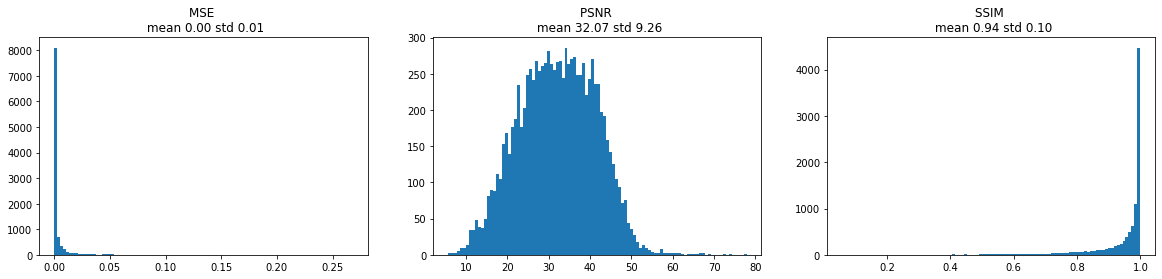

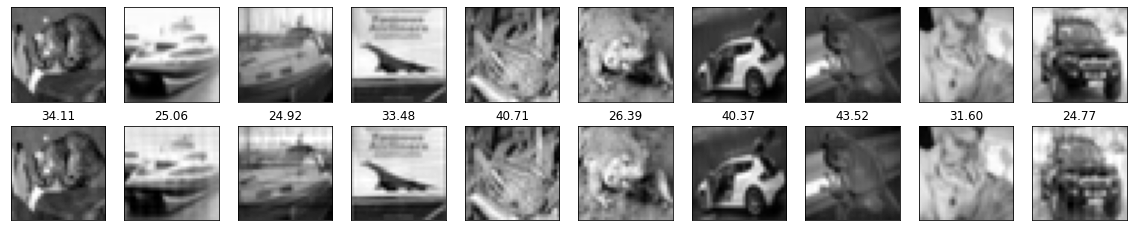

In [8]:
print("mnist vs mnist")
rec_mnist, mse_mnist,psnr_mnist,ssim_mnist = test_abs(n_test_mnist, n_batch, n_steps, alpha, u_mnist, x_test_mnist)
plot_test(rec_mnist,
          x_test_mnist,
          mse_mnist,
          psnr_mnist,
          ssim_mnist,
          n_test_mnist,
          plot_n = 10)

print("mnist vs fmnist")
rec_fmnist, mse_fmnist,psnr_fmnist,ssim_fmnist = test_abs(n_test_fmnist, n_batch, n_steps,alpha, u_mnist, x_test_fmnist)
plot_test(rec_fmnist,
          x_test_fmnist,
          mse_fmnist,
          psnr_fmnist,
          ssim_fmnist,
          n_test_fmnist,
          plot_n = 10)

print("mnist vs cifar")
rec_cifar,mse_cifar,psnr_cifar,ssim_cifar = test_abs(n_test_cifar, n_batch, n_steps,alpha, u_mnist, x_test_cifar)
plot_test(rec_cifar,
          x_test_cifar,
          mse_cifar,
          psnr_cifar,
          ssim_cifar,
          n_test_cifar,
          plot_n = 10)

  3%|▎         | 9/313 [00:00<00:03, 81.53it/s]

fmnist vs mnist


100%|██████████| 313/313 [00:03<00:00, 81.54it/s]


mse 0.00
psnr 49.44
ssim 0.96
mean mse 0.00
psnr of mean 25.70
psnr of mean (mean of psnr) 25.70(49.44)


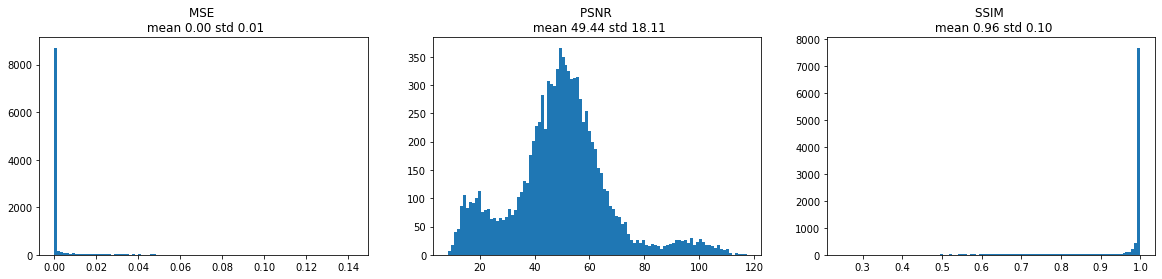

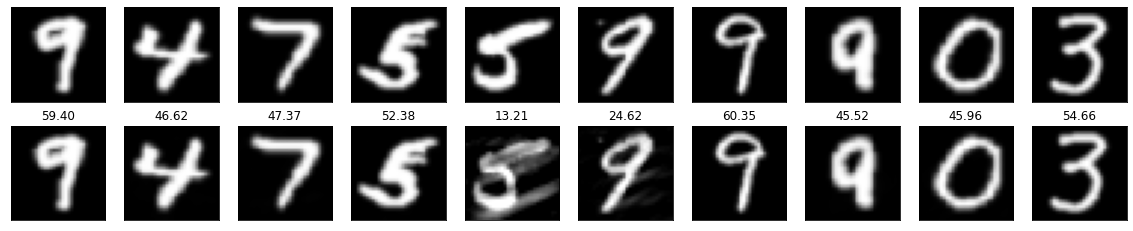

  3%|▎         | 9/313 [00:00<00:03, 81.41it/s]

fmnist vs fmnist


100%|██████████| 313/313 [00:03<00:00, 81.41it/s]


mse 0.00
psnr 49.07
ssim 0.98
mean mse 0.00
psnr of mean 29.56
psnr of mean (mean of psnr) 29.56(49.07)


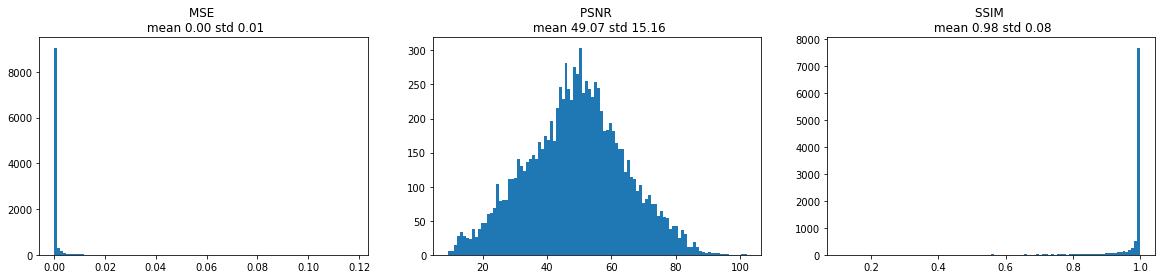

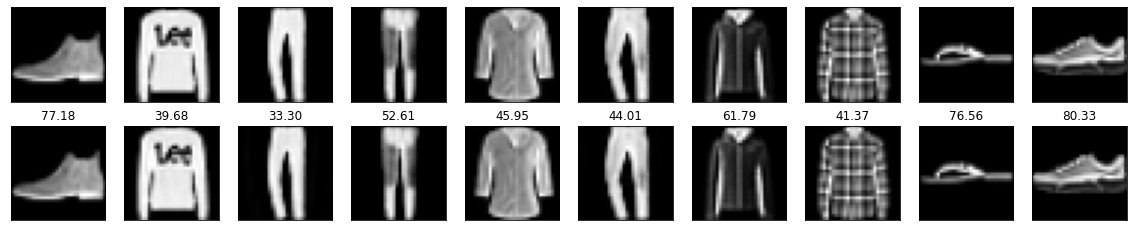

  3%|▎         | 9/313 [00:00<00:03, 81.70it/s]

fmnist vs cifar


100%|██████████| 313/313 [00:03<00:00, 81.75it/s]


mse 0.01
psnr 28.58
ssim 0.89
mean mse 0.01
psnr of mean 19.37
psnr of mean (mean of psnr) 19.37(28.58)


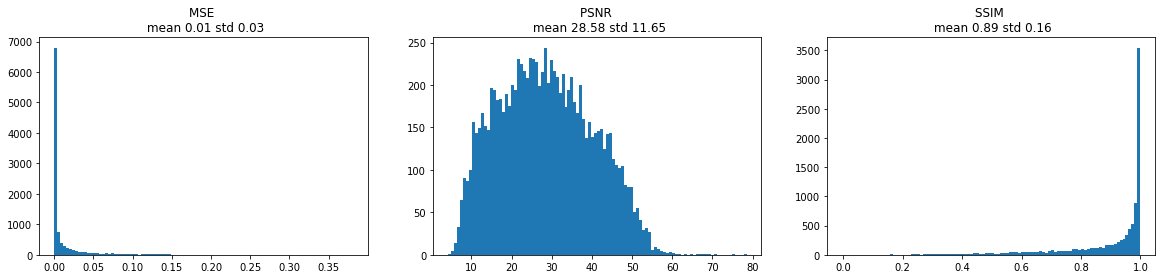

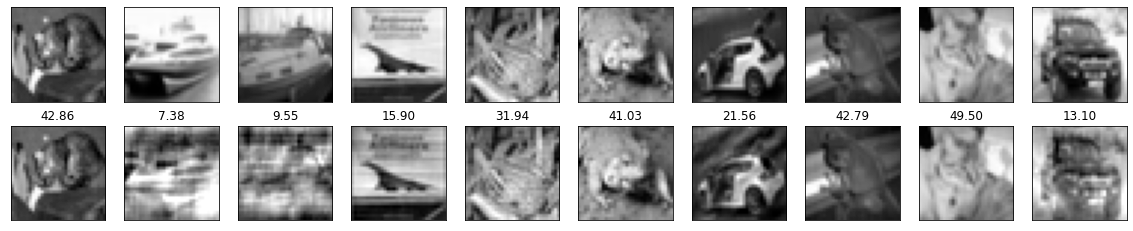

In [9]:
print("fmnist vs mnist")
rec_mnist,mse_mnist,psnr_mnist,ssim_mnist = test_abs(n_test_mnist, n_batch, n_steps, alpha, u_fmnist, x_test_mnist)
plot_test(rec_mnist,
          x_test_mnist,
          mse_mnist,
          psnr_mnist,
          ssim_mnist,
          n_test_mnist,
          plot_n = 10)

print("fmnist vs fmnist")
rec_fmnist, mse_fmnist,psnr_fmnist,ssim_fmnist = test_abs(n_test_fmnist, n_batch, n_steps,alpha, u_fmnist, x_test_fmnist)
plot_test(rec_fmnist,
          x_test_fmnist,
          mse_fmnist,
          psnr_fmnist,
          ssim_fmnist,
          n_test_fmnist,
          plot_n = 10)

print("fmnist vs cifar")
rec_cifar,mse_cifar,psnr_cifar,ssim_cifar = test_abs(n_test_cifar, n_batch, n_steps,alpha, u_fmnist, x_test_cifar)
plot_test(rec_cifar,
          x_test_cifar,
          mse_cifar,
          psnr_cifar,
          ssim_cifar,
          n_test_cifar,
          plot_n = 10)

  3%|▎         | 9/313 [00:00<00:03, 81.17it/s]

cifar vs mnist


100%|██████████| 313/313 [00:03<00:00, 81.67it/s]


mse 0.00
psnr 52.04
ssim 0.98
mean mse 0.00
psnr of mean 27.95
psnr of mean (mean of psnr) 27.95(52.04)


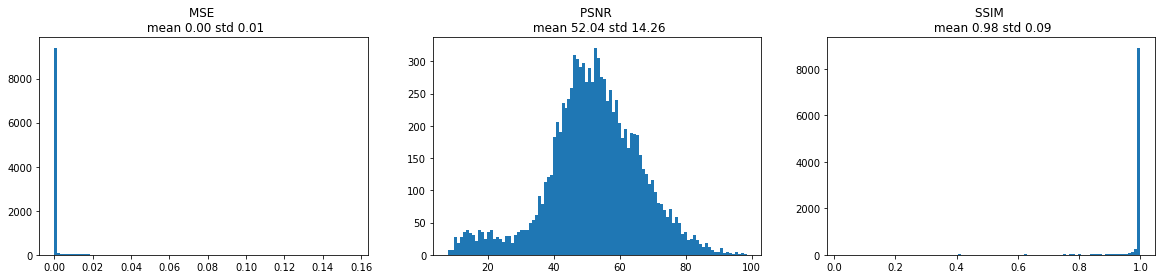

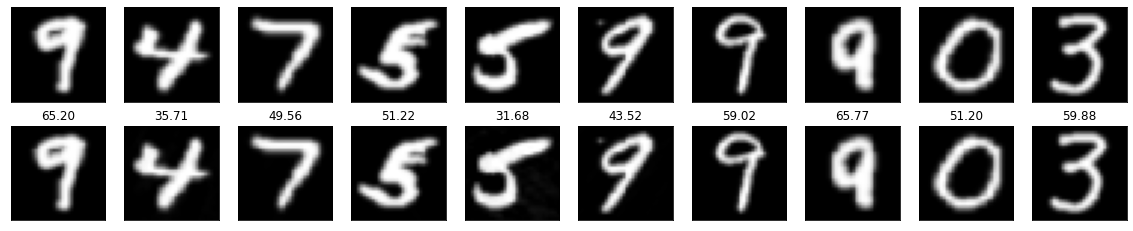

  3%|▎         | 9/313 [00:00<00:03, 81.39it/s]

cifar vs fmnist


100%|██████████| 313/313 [00:03<00:00, 81.67it/s]


mse 0.00
psnr 49.63
ssim 0.97
mean mse 0.00
psnr of mean 30.90
psnr of mean (mean of psnr) 30.90(49.63)


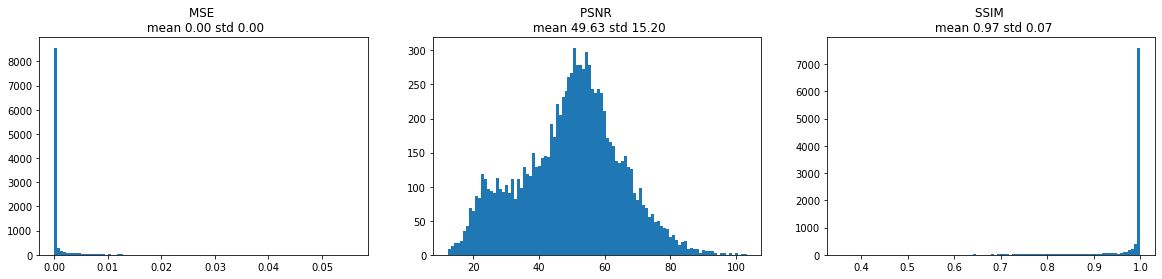

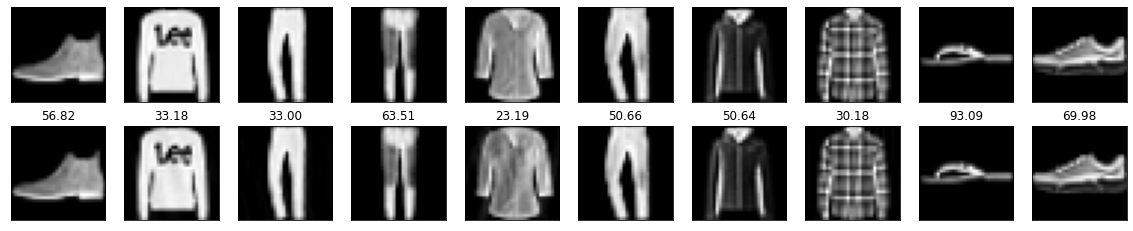

  3%|▎         | 9/313 [00:00<00:03, 81.77it/s]

cifar vs cifar


100%|██████████| 313/313 [00:03<00:00, 81.80it/s]


mse 0.00
psnr 37.20
ssim 0.97
mean mse 0.00
psnr of mean 28.47
psnr of mean (mean of psnr) 28.47(37.20)


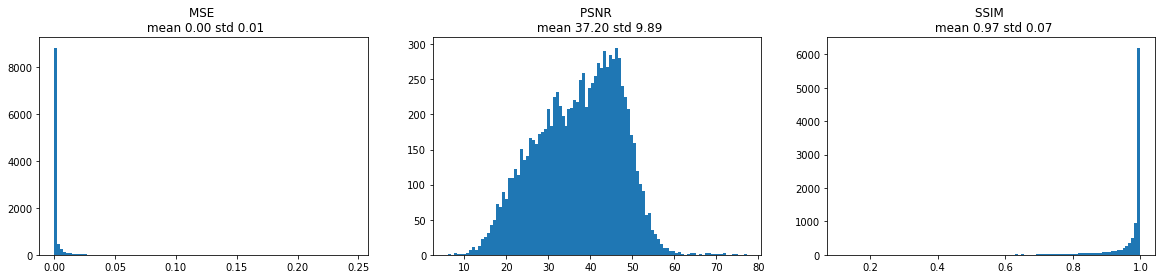

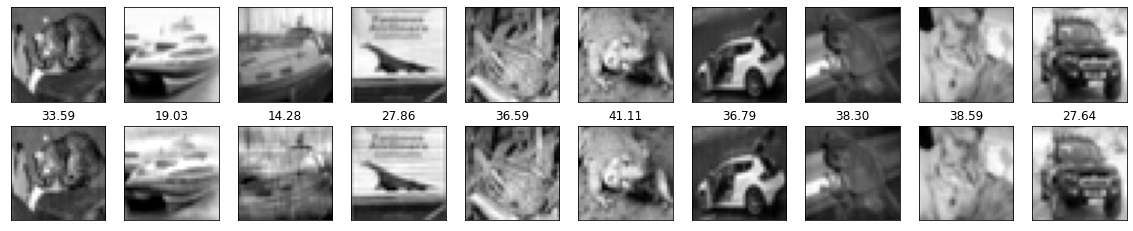

In [10]:
print("cifar vs mnist")
rec_mnist,mse_mnist,psnr_mnist,ssim_mnist = test_abs(n_test_mnist, n_batch, n_steps, alpha, u_cifar, x_test_mnist)
plot_test(rec_mnist,
          x_test_mnist,
          mse_mnist,
          psnr_mnist,
          ssim_mnist,
          n_test_mnist,
          plot_n = 10)

print("cifar vs fmnist")
rec_fmnist,mse_fmnist,psnr_fmnist,ssim_fmnist = test_abs(n_test_fmnist, n_batch, n_steps, alpha, u_cifar, x_test_fmnist)
plot_test(rec_fmnist,
          x_test_fmnist,
          mse_fmnist,
          psnr_fmnist,
          ssim_fmnist,
          n_test_fmnist,
          plot_n = 10)

print("cifar vs cifar")
rec_cifar,mse_cifar,psnr_cifar,ssim_cifar = test_abs(n_test_cifar, n_batch, n_steps,alpha, u_cifar, x_test_cifar)
plot_test(rec_cifar,
          x_test_cifar,
          mse_cifar,
          psnr_cifar,
          ssim_cifar,
          n_test_cifar,
          plot_n = 10)